In [22]:
import torch
from torchvision import transforms
from torchvision.io import read_image, ImageReadMode
from torch.nn import Softmax
from monai.networks.nets import densenet121


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = densenet121(spatial_dims=2, in_channels=1, out_channels=2).to(device)

In [31]:
model.load_state_dict(torch.load("baseline_training/checkpoint.pth")) 

image = read_image("../data/raw/head_ct/100.png", mode = ImageReadMode.GRAY ).type(torch.float32)

softmax = Softmax(dim = 1)

softmax(model(image.unsqueeze(0)))

tensor([[0.0165, 0.9835]], grad_fn=<SoftmaxBackward0>)

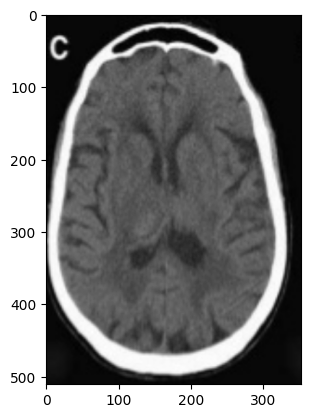

In [32]:
import matplotlib.pyplot as plt 

plt.imshow(image.unsqueeze(0)[0,0,:,:], cmap = "gray")